# Neural Networks - Introduction 

In [2]:
!pip3 install tensorflow keras

You should consider upgrading via the 'C:\Users\cneub\Desktop\mlnn-masamitsu\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [26]:
from sklearn.linear_model import LogisticRegression

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD  #Stochastic Gradient Descent

import numpy as np
# fix random seed for reproducibility
np.random.seed(7)

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

In [18]:
X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

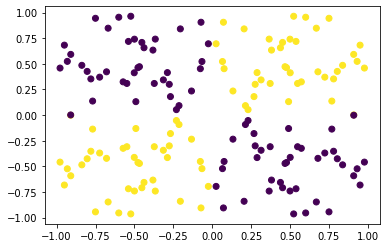

In [19]:
plt.scatter(*zip(*X), c=y)

In [27]:
model = Sequential()

model.add(Dense(2, input_dim=2, activation='tanh'))  #sigmoid, relu
# model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1,input_dim=2, activation='sigmoid'))


sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer='sgd')

model.fit(X, y, batch_size=2, epochs=40) #160/4 = 40 per epoch
print(model.predict_proba(X).reshape(4*n))

# evaluate the model
scores = model.evaluate(X, y)

Epoch 1/40
80/80 [==============================] - 0s 576us/step - loss: 0.6972
Epoch 2/40
80/80 [==============================] - 0s 492us/step - loss: 0.6961
Epoch 3/40
80/80 [==============================] - 0s 562us/step - loss: 0.6950
Epoch 4/40
80/80 [==============================] - 0s 518us/step - loss: 0.6940
Epoch 5/40
80/80 [==============================] - 0s 492us/step - loss: 0.6934
Epoch 6/40
80/80 [==============================] - 0s 530us/step - loss: 0.6926
Epoch 7/40
80/80 [==============================] - 0s 505us/step - loss: 0.6920
Epoch 8/40
80/80 [==============================] - 0s 518us/step - loss: 0.6913
Epoch 9/40
80/80 [==============================] - 0s 505us/step - loss: 0.6906
Epoch 10/40
80/80 [==============================] - 0s 549us/step - loss: 0.6900
Epoch 11/40
80/80 [==============================] - 0s 518us/step - loss: 0.6894
Epoch 12/40
80/80 [==============================] - 0s 492us/step - loss: 0.6887
Epoch 13/40
80/80 [======

AttributeError: 'Sequential' object has no attribute 'predict_proba'

In [28]:
print(model.predict_proba(X).reshape(4*n))


AttributeError: 'Sequential' object has no attribute 'predict_proba'

In [30]:
scores = model.evaluate(X, y)
scores, model.metrics_names

5/5 [==============================] - 0s 748us/step - loss: 0.6496


(0.6496169567108154, ['loss'])

In [31]:
plt.scatter(*zip(*X), c=model.predict_classes(X))

AttributeError: 'Sequential' object has no attribute 'predict_classes'

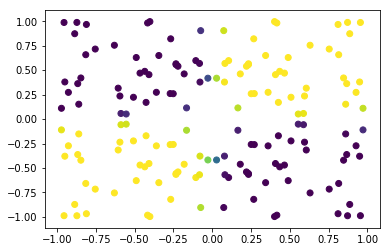

In [128]:
plt.scatter(*zip(*X), c=model.predict(X))

## Using Diabetes data 

http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

In [34]:
# load pima indians dataset
dataset = np.loadtxt("../data/pima-indians-diabetes.data", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [39]:
X.shape

(768, 8)

In [40]:
Y.shape

(768,)

In [35]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=8, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=1000, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/1000
77/77 [==============================] - 0s 748us/step - loss: 0.6455 - accuracy: 0.6341
Epoch 2/1000
77/77 [==============================] - 0s 701us/step - loss: 0.6249 - accuracy: 0.6497
Epoch 3/1000
77/77 [==============================] - 0s 750us/step - loss: 0.6175 - accuracy: 0.6406
Epoch 4/1000
77/77 [==============================] - 0s 702us/step - loss: 0.6112 - accuracy: 0.6510
Epoch 5/1000
77/77 [==============================] - 0s 709us/step - loss: 0.6021 - accuracy: 0.6549
Epoch 6/1000
77/77 [==============================] - 0s 741us/step - loss: 0.6002 - accuracy: 0.6758
Epoch 7/1000
77/77 [==============================] - 0s 722us/step - loss: 0.6011 - accuracy: 0.6836
Epoch 8/1000
77/77 [==============================] - 0s 722us/step - loss: 0.5960 - accuracy: 0.6797
Epoch 9/1000
77/77 [==============================] - 0s 696us/step - loss: 0.5970 - accuracy: 0.6628
Epoch 10/1000
77/77 [==============================] - 0s 749us/step - loss: 0.592

77/77 [==============================] - 0s 753us/step - loss: 0.5455 - accuracy: 0.7174
Epoch 81/1000
77/77 [==============================] - 0s 761us/step - loss: 0.5370 - accuracy: 0.7318
Epoch 82/1000
77/77 [==============================] - 0s 709us/step - loss: 0.5383 - accuracy: 0.7318
Epoch 83/1000
77/77 [==============================] - 0s 766us/step - loss: 0.5376 - accuracy: 0.7227
Epoch 84/1000
77/77 [==============================] - 0s 709us/step - loss: 0.5417 - accuracy: 0.7214
Epoch 85/1000
77/77 [==============================] - 0s 710us/step - loss: 0.5386 - accuracy: 0.7279
Epoch 86/1000
77/77 [==============================] - 0s 697us/step - loss: 0.5375 - accuracy: 0.7135
Epoch 87/1000
77/77 [==============================] - 0s 816us/step - loss: 0.5312 - accuracy: 0.7305
Epoch 88/1000
77/77 [==============================] - 0s 696us/step - loss: 0.5327 - accuracy: 0.7253
Epoch 89/1000
77/77 [==============================] - 0s 718us/step - loss: 0.5304 - a

77/77 [==============================] - 0s 722us/step - loss: 0.5096 - accuracy: 0.7435
Epoch 160/1000
77/77 [==============================] - 0s 712us/step - loss: 0.5158 - accuracy: 0.7305
Epoch 161/1000
77/77 [==============================] - 0s 709us/step - loss: 0.5135 - accuracy: 0.7383
Epoch 162/1000
77/77 [==============================] - 0s 722us/step - loss: 0.5164 - accuracy: 0.7318
Epoch 163/1000
77/77 [==============================] - 0s 709us/step - loss: 0.5194 - accuracy: 0.7331
Epoch 164/1000
77/77 [==============================] - 0s 740us/step - loss: 0.5085 - accuracy: 0.7422
Epoch 165/1000
77/77 [==============================] - 0s 740us/step - loss: 0.5167 - accuracy: 0.7292
Epoch 166/1000
77/77 [==============================] - 0s 748us/step - loss: 0.5053 - accuracy: 0.7370
Epoch 167/1000
77/77 [==============================] - 0s 712us/step - loss: 0.5112 - accuracy: 0.7318
Epoch 168/1000
77/77 [==============================] - 0s 682us/step - loss: 0

77/77 [==============================] - 0s 748us/step - loss: 0.4935 - accuracy: 0.7396
Epoch 238/1000
77/77 [==============================] - 0s 735us/step - loss: 0.4881 - accuracy: 0.7565
Epoch 239/1000
77/77 [==============================] - 0s 722us/step - loss: 0.5004 - accuracy: 0.7435
Epoch 240/1000
77/77 [==============================] - 0s 708us/step - loss: 0.5238 - accuracy: 0.7096
Epoch 241/1000
77/77 [==============================] - 0s 682us/step - loss: 0.4993 - accuracy: 0.7370
Epoch 242/1000
77/77 [==============================] - 0s 748us/step - loss: 0.4993 - accuracy: 0.7370
Epoch 243/1000
77/77 [==============================] - 0s 709us/step - loss: 0.5039 - accuracy: 0.7422
Epoch 244/1000
77/77 [==============================] - 0s 704us/step - loss: 0.4902 - accuracy: 0.7461
Epoch 245/1000
77/77 [==============================] - 0s 712us/step - loss: 0.4929 - accuracy: 0.7383
Epoch 246/1000
77/77 [==============================] - 0s 722us/step - loss: 0

Epoch 316/1000
77/77 [==============================] - 0s 722us/step - loss: 0.4910 - accuracy: 0.7500
Epoch 317/1000
77/77 [==============================] - 0s 748us/step - loss: 0.4876 - accuracy: 0.7461
Epoch 318/1000
77/77 [==============================] - 0s 709us/step - loss: 0.4959 - accuracy: 0.7357
Epoch 319/1000
77/77 [==============================] - 0s 735us/step - loss: 0.4958 - accuracy: 0.7448
Epoch 320/1000
77/77 [==============================] - 0s 709us/step - loss: 0.4870 - accuracy: 0.7448
Epoch 321/1000
77/77 [==============================] - 0s 741us/step - loss: 0.4819 - accuracy: 0.7487
Epoch 322/1000
77/77 [==============================] - 0s 709us/step - loss: 0.4908 - accuracy: 0.7422
Epoch 323/1000
77/77 [==============================] - 0s 720us/step - loss: 0.4852 - accuracy: 0.7487
Epoch 324/1000
77/77 [==============================] - 0s 735us/step - loss: 0.4881 - accuracy: 0.7513
Epoch 325/1000
77/77 [==============================] - 0s 709us

77/77 [==============================] - 0s 748us/step - loss: 0.4860 - accuracy: 0.7409
Epoch 395/1000
77/77 [==============================] - 0s 735us/step - loss: 0.4783 - accuracy: 0.7565
Epoch 396/1000
77/77 [==============================] - 0s 774us/step - loss: 0.4907 - accuracy: 0.7435
Epoch 397/1000
77/77 [==============================] - 0s 709us/step - loss: 0.4981 - accuracy: 0.7279
Epoch 398/1000
77/77 [==============================] - 0s 761us/step - loss: 0.4804 - accuracy: 0.7604
Epoch 399/1000
77/77 [==============================] - 0s 722us/step - loss: 0.4900 - accuracy: 0.7526
Epoch 400/1000
77/77 [==============================] - 0s 744us/step - loss: 0.4892 - accuracy: 0.7344
Epoch 401/1000
77/77 [==============================] - 0s 696us/step - loss: 0.4845 - accuracy: 0.7487
Epoch 402/1000
77/77 [==============================] - 0s 729us/step - loss: 0.4813 - accuracy: 0.7539
Epoch 403/1000
77/77 [==============================] - 0s 709us/step - loss: 0

77/77 [==============================] - 0s 729us/step - loss: 0.4785 - accuracy: 0.7448
Epoch 473/1000
77/77 [==============================] - 0s 696us/step - loss: 0.4755 - accuracy: 0.7474
Epoch 474/1000
77/77 [==============================] - 0s 722us/step - loss: 0.4812 - accuracy: 0.7474
Epoch 475/1000
77/77 [==============================] - 0s 907us/step - loss: 0.4844 - accuracy: 0.7474
Epoch 476/1000
77/77 [==============================] - 0s 735us/step - loss: 0.4923 - accuracy: 0.7552
Epoch 477/1000
77/77 [==============================] - 0s 750us/step - loss: 0.4895 - accuracy: 0.7435
Epoch 478/1000
77/77 [==============================] - 0s 787us/step - loss: 0.4878 - accuracy: 0.7331
Epoch 479/1000
77/77 [==============================] - 0s 846us/step - loss: 0.4807 - accuracy: 0.7500
Epoch 480/1000
77/77 [==============================] - 0s 738us/step - loss: 0.4852 - accuracy: 0.7461
Epoch 481/1000
77/77 [==============================] - 0s 735us/step - loss: 0

77/77 [==============================] - 0s 780us/step - loss: 0.4732 - accuracy: 0.7552
Epoch 551/1000
77/77 [==============================] - 0s 787us/step - loss: 0.4785 - accuracy: 0.7422
Epoch 552/1000
77/77 [==============================] - 0s 774us/step - loss: 0.4730 - accuracy: 0.7513
Epoch 553/1000
77/77 [==============================] - 0s 735us/step - loss: 0.4710 - accuracy: 0.7448
Epoch 554/1000
77/77 [==============================] - 0s 753us/step - loss: 0.4706 - accuracy: 0.7474
Epoch 555/1000
77/77 [==============================] - 0s 735us/step - loss: 0.4742 - accuracy: 0.7474
Epoch 556/1000
77/77 [==============================] - 0s 804us/step - loss: 0.4916 - accuracy: 0.7266
Epoch 557/1000
77/77 [==============================] - 0s 774us/step - loss: 0.4800 - accuracy: 0.7513
Epoch 558/1000
77/77 [==============================] - 0s 762us/step - loss: 0.4821 - accuracy: 0.7357
Epoch 559/1000
77/77 [==============================] - 0s 761us/step - loss: 0

77/77 [==============================] - 0s 738us/step - loss: 0.4733 - accuracy: 0.7474
Epoch 629/1000
77/77 [==============================] - 0s 735us/step - loss: 0.4760 - accuracy: 0.7500
Epoch 630/1000
77/77 [==============================] - 0s 753us/step - loss: 0.4762 - accuracy: 0.7539
Epoch 631/1000
77/77 [==============================] - 0s 774us/step - loss: 0.4741 - accuracy: 0.7448
Epoch 632/1000
77/77 [==============================] - 0s 735us/step - loss: 0.4799 - accuracy: 0.7422
Epoch 633/1000
77/77 [==============================] - 0s 774us/step - loss: 0.4826 - accuracy: 0.7461
Epoch 634/1000
77/77 [==============================] - 0s 761us/step - loss: 0.4787 - accuracy: 0.7461
Epoch 635/1000
77/77 [==============================] - 0s 735us/step - loss: 0.4772 - accuracy: 0.7448
Epoch 636/1000
77/77 [==============================] - 0s 735us/step - loss: 0.4701 - accuracy: 0.7526
Epoch 637/1000
77/77 [==============================] - 0s 722us/step - loss: 0

77/77 [==============================] - 0s 787us/step - loss: 0.4862 - accuracy: 0.7435
Epoch 707/1000
77/77 [==============================] - 0s 737us/step - loss: 0.4887 - accuracy: 0.7409
Epoch 708/1000
77/77 [==============================] - 0s 801us/step - loss: 0.4865 - accuracy: 0.7448
Epoch 709/1000
77/77 [==============================] - 0s 761us/step - loss: 0.4799 - accuracy: 0.7526
Epoch 710/1000
77/77 [==============================] - 0s 827us/step - loss: 0.4730 - accuracy: 0.7539
Epoch 711/1000
77/77 [==============================] - 0s 735us/step - loss: 0.4692 - accuracy: 0.7552
Epoch 712/1000
77/77 [==============================] - 0s 774us/step - loss: 0.4708 - accuracy: 0.7565
Epoch 713/1000
77/77 [==============================] - 0s 722us/step - loss: 0.4759 - accuracy: 0.7526
Epoch 714/1000
77/77 [==============================] - 0s 765us/step - loss: 0.4739 - accuracy: 0.7500
Epoch 715/1000
77/77 [==============================] - 0s 748us/step - loss: 0

Epoch 785/1000
77/77 [==============================] - 0s 774us/step - loss: 0.4736 - accuracy: 0.7617
Epoch 786/1000
77/77 [==============================] - 0s 776us/step - loss: 0.4652 - accuracy: 0.7695
Epoch 787/1000
77/77 [==============================] - 0s 744us/step - loss: 0.4629 - accuracy: 0.7604
Epoch 788/1000
77/77 [==============================] - 0s 801us/step - loss: 0.4604 - accuracy: 0.7656
Epoch 789/1000
77/77 [==============================] - 0s 819us/step - loss: 0.4653 - accuracy: 0.7630
Epoch 790/1000
77/77 [==============================] - 0s 749us/step - loss: 0.4782 - accuracy: 0.7591
Epoch 791/1000
77/77 [==============================] - 0s 768us/step - loss: 0.4656 - accuracy: 0.7695
Epoch 792/1000
77/77 [==============================] - 0s 791us/step - loss: 0.4691 - accuracy: 0.7643
Epoch 793/1000
77/77 [==============================] - 0s 761us/step - loss: 0.4722 - accuracy: 0.7617
Epoch 794/1000
77/77 [==============================] - 0s 774us

77/77 [==============================] - 0s 775us/step - loss: 0.4667 - accuracy: 0.7708
Epoch 864/1000
77/77 [==============================] - 0s 787us/step - loss: 0.4624 - accuracy: 0.7656
Epoch 865/1000
77/77 [==============================] - 0s 774us/step - loss: 0.4615 - accuracy: 0.7734
Epoch 866/1000
77/77 [==============================] - 0s 739us/step - loss: 0.4604 - accuracy: 0.7734
Epoch 867/1000
77/77 [==============================] - 0s 804us/step - loss: 0.4548 - accuracy: 0.7734
Epoch 868/1000
77/77 [==============================] - 0s 862us/step - loss: 0.4553 - accuracy: 0.7721
Epoch 869/1000
77/77 [==============================] - 0s 990us/step - loss: 0.4594 - accuracy: 0.7695
Epoch 870/1000
77/77 [==============================] - 0s 845us/step - loss: 0.4576 - accuracy: 0.7695
Epoch 871/1000
77/77 [==============================] - 0s 834us/step - loss: 0.4537 - accuracy: 0.7747
Epoch 872/1000
77/77 [==============================] - 0s 814us/step - loss: 0

Epoch 943/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.7591
Epoch 944/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.7604
Epoch 945/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.4571 - accuracy: 0.7695
Epoch 946/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.4524 - accuracy: 0.7747
Epoch 947/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 0.7734
Epoch 948/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.4519 - accuracy: 0.7786
Epoch 949/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.7565
Epoch 950/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.7760
Epoch 951/1000
77/77 [==============================] - 0s 3ms/step - loss: 0.4527 - accuracy: 0.7695
Epoch 952/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.4551

https://stackoverflow.com/questions/34673164/how-to-train-and-tune-an-artificial-multilayer-perceptron-neural-network-using-k

https://keras.io/